<a href="https://colab.research.google.com/github/MoazAbbas/DES-in-CBC-mode-Encryption/blob/main/DataScience_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
  #loading the file path
file_path = r'/content/heart.csv'
df = pd.read_csv(file_path)

In [71]:
# Part A
#Printing the first 12 rows
print("First 12 rows:")
print(df.head(12))


First 12 rows:
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    54   M           ATA        110          208          0     Normal   
8    37   M           ASY        140          207          0     Normal   
9    48   F           ATA        120          284          0     Normal   
10   37   F           NAP        130          211          0     Normal   
11   58   M           ATA        136          164          0         ST   

    MaxHR

In [72]:
# Part B
# number of rows and coloms
rows, columns = df.shape
print(f"Total number of rows: {rows}")
print(f"Total number of columns: {columns}")

Total number of rows: 918
Total number of columns: 12


In [73]:
# Part C
#coloms with their data type
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [74]:
# Part D
#Name of the first coloum
first_column_name = df.columns[0]
print(f"The name of the first column is: {first_column_name}")

The name of the first column is: Age


In [75]:
# Part E
#summary
print("Summary of the dataset:")
print(df.info())

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [76]:
# Part F
#categorical attribute and display the distinct values
categorical_attribute = 'ST_Slope'
distinct_values = df[categorical_attribute].unique()
print(f"Distinct values in '{categorical_attribute}': {distinct_values}")

Distinct values in 'ST_Slope': ['Up' 'Flat' 'Down']


In [77]:
# Part G
#Most occuring value in the chosen categotical attribute
#using the variable catigorical attribute from part F
most_frequent_value = df[categorical_attribute].mode()[0]
print(f"The most frequently occurring value in '{categorical_attribute}' is: {most_frequent_value}")

The most frequently occurring value in 'ST_Slope' is: Flat


In [78]:
# Part H
#Calculating the mean , Median , Standard deviation and percintiles for all numerical values
numerical_attributes = df.select_dtypes(include=[np.number]).columns

for attribute in numerical_attributes:
    mean_value = df[attribute].mean()
    median_value = df[attribute].median()
    std_dev_value = df[attribute].std()
    percentile_20 = df[attribute].quantile(0.2)
    percentile_25 = df[attribute].quantile(0.25)
    percentile_40 = df[attribute].quantile(0.40)
    percentile_50 = df[attribute].quantile(0.5)
    percentile_75 = df[attribute].quantile(0.75)

    print(f"Statistics for '{attribute}':")
    print(f"  Mean: {mean_value}")
    print(f"  Median: {median_value}")
    print(f"  Standard Deviation: {std_dev_value}")
    print(f"  20th Percentile: {percentile_20}")
    print(f"  25th Percentile: {percentile_25}")
    print(f"  40th Percentile: {percentile_40}")
    print(f"  50th Percentile: {percentile_50}")
    print(f"  75th Percentile: {percentile_75}")
    print("----------------------")

Statistics for 'Age':
  Mean: 53.510893246187365
  Median: 54.0
  Standard Deviation: 9.432616506732007
  20th Percentile: 45.0
  25th Percentile: 47.0
  40th Percentile: 52.0
  50th Percentile: 54.0
  75th Percentile: 60.0
----------------------
Statistics for 'RestingBP':
  Mean: 132.39651416122004
  Median: 130.0
  Standard Deviation: 18.514154119907808
  20th Percentile: 120.0
  25th Percentile: 120.0
  40th Percentile: 128.0
  50th Percentile: 130.0
  75th Percentile: 140.0
----------------------
Statistics for 'Cholesterol':
  Mean: 198.7995642701525
  Median: 223.0
  Standard Deviation: 109.38414455220337
  20th Percentile: 134.80000000000004
  25th Percentile: 173.25
  40th Percentile: 209.0
  50th Percentile: 223.0
  75th Percentile: 267.0
----------------------
Statistics for 'FastingBS':
  Mean: 0.23311546840958605
  Median: 0.0
  Standard Deviation: 0.423045624739302
  20th Percentile: 0.0
  25th Percentile: 0.0
  40th Percentile: 0.0
  50th Percentile: 0.0
  75th Percentil

In [79]:
# Data Preparation Tasks

In [80]:
# Part A
# Filter rows where 'Age' exceeds 50
filtered_df = df[df['Age'] > 50]
print("Rows where 'Age' exceeds 50:")
print(filtered_df)

Rows where 'Age' exceeds 50:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
4     54   M           NAP        150          195          0     Normal   
7     54   M           ATA        110          208          0     Normal   
11    58   M           ATA        136          164          0         ST   
15    54   F           ATA        120          273          0     Normal   
18    60   M           ASY        100          248          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
911   59   M           ASY        164          176          1        LVH   
912   57   F           ASY        140          241          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease 

In [81]:
# Part B
#Get and count the number of records starts with U
attribute = 'ST_Slope'
starting_letter = 'U'
filtered_df = df[df[attribute].str.startswith(starting_letter, na=False)]
matching_records_count = filtered_df.shape[0]
print(f"Rows where '{attribute}' starts with '{starting_letter}':")
print(filtered_df)
print(f"Number of matching records: {matching_records_count}")

Rows where 'ST_Slope' starts with 'U':
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
2     37   M           ATA        130          283          0         ST   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
903   56   M           ATA        130          221          0        LVH   
906   55   F           ATA        132          342          0     Normal   
908   63   M           ASY        140          187          0        LVH   
910   41   M           ATA        120          157          0     Normal   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  Hea

In [82]:
# Part C
# Determines the number of duplicate rows and drop them
duplicate_rows_count = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows_count}")
if duplicate_rows_count > 0:
    df = df.drop_duplicates() #droping the duplicate row
    print("Duplicate rows have been removed.")
else:
    print("No duplicate rows found.")

Total number of duplicate rows: 0
No duplicate rows found.


In [83]:
# Part D
#Converting the age into string
df['Age'] = df['Age'].astype(str)
print(df.dtypes)

Age                object
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [84]:
# Part E
#Grouping the data set based on sex and ChestPainType
grouped_df = df.groupby(['Sex', 'ChestPainType']).mean(numeric_only=True)
print("Grouped and aggregated results by 'Sex' and 'ChestPainType':")
print(grouped_df)

Grouped and aggregated results by 'Sex' and 'ChestPainType':
                    RestingBP  Cholesterol  FastingBS       MaxHR   Oldpeak  \
Sex ChestPainType                                                             
F   ASY            136.242857   235.200000   0.200000  139.128571  1.154286   
    ATA            128.650000   249.350000   0.083333  152.366667  0.315000   
    NAP            129.264151   245.603774   0.094340  148.528302  0.416981   
    TA             141.000000   210.900000   0.200000  145.200000  0.730000   
M   ASY            132.734742   178.666667   0.298122  126.727700  1.164085   
    ATA            131.672566   224.389381   0.123894  149.061947  0.303540   
    NAP            131.560000   180.420000   0.240000  141.366667  0.766000   
    TA             135.138889   206.000000   0.305556  148.638889  1.122222   

                   HeartDisease  
Sex ChestPainType                
F   ASY                0.557143  
    ATA                0.066667  
    NAP     

In [85]:
# Part F
#Check if there is any thing missing in any coloum
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
total_missing = missing_values.sum()
if total_missing > 0:
    print(f"Total number of missing values in the dataset: {total_missing}")
else:
    print("No missing values found in the dataset.")

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
No missing values found in the dataset.


In [86]:
# Part G
#If any data missing replace them with the median or mode
for column in df.columns:
    if df[column].dtype in [np.float64, np.int64]:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
    else:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

missing_values_after = df.isnull().sum()
print("Missing values in each column after replacement:")
print(missing_values_after)

Missing values in each column after replacement:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [87]:
# Part H
#Divide the age column into 5 equal-width bins and count the number of records in each bin
df['Age'] = df['Age'].astype(int)
chosen_column = 'Age'
bins = pd.cut(df[chosen_column], bins=5)
bin_counts = bins.value_counts()
print(f"Number of records in each bin for '{chosen_column}':")
print(bin_counts)

Number of records in each bin for 'Age':
Age
(47.6, 57.4]      349
(57.4, 67.2]      276
(37.8, 47.6]      190
(67.2, 77.0]       54
(27.951, 37.8]     49
Name: count, dtype: int64


In [88]:
#Part I

selected_feature = 'Age'
max_index = df[selected_feature].idxmax()
max_row = df.loc[max_index]
print(f"Row with the maximum value in '{selected_feature}':")
print(max_row)
# We printed the data of the oldest person in the dataset aged 77 years old

Row with the maximum value in 'Age':
Age                77
Sex                 M
ChestPainType     ASY
RestingBP         124
Cholesterol       171
FastingBS           0
RestingECG         ST
MaxHR             110
ExerciseAngina      Y
Oldpeak           2.0
ST_Slope           Up
HeartDisease        1
Name: 447, dtype: object


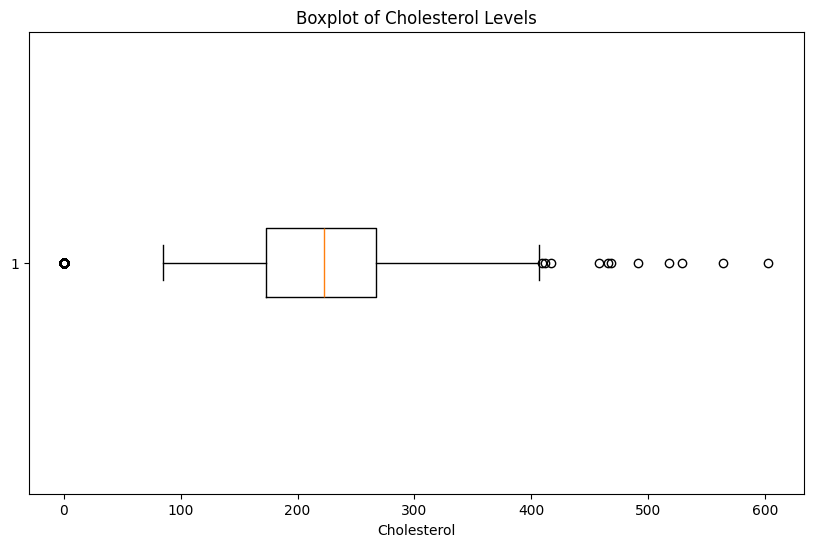

In [89]:
#Part J
plt.figure(figsize=(10, 6))
plt.boxplot(df['Cholesterol'].dropna(), vert=False)
plt.title('Boxplot of Cholesterol Levels')
plt.xlabel('Cholesterol')
plt.show()
# We chose Cholesterol as a significant variable, it is a right skewed boxplot
# and we have many outliers most of them on the high side

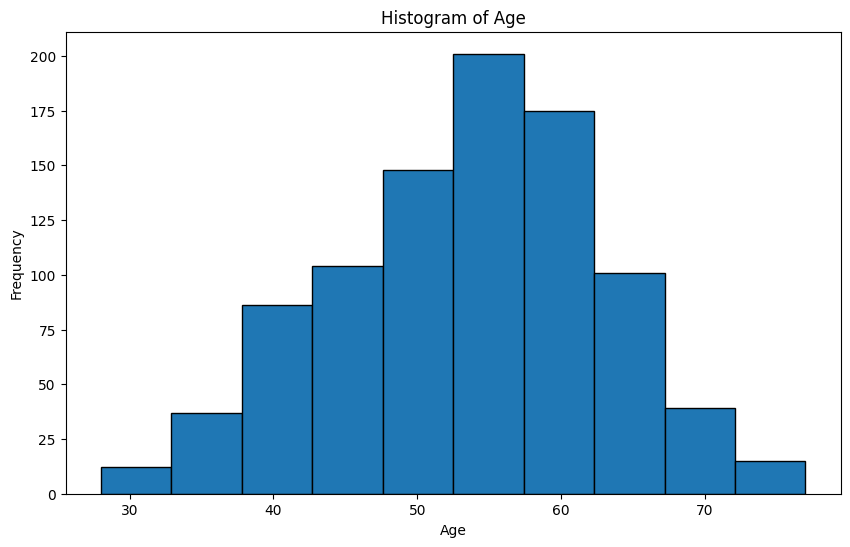

In [90]:
#Part K
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=10, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#We chose to analyze the age, the most frequent age is inbetween 50 and 60. The histogram is normal but slightly right skewed

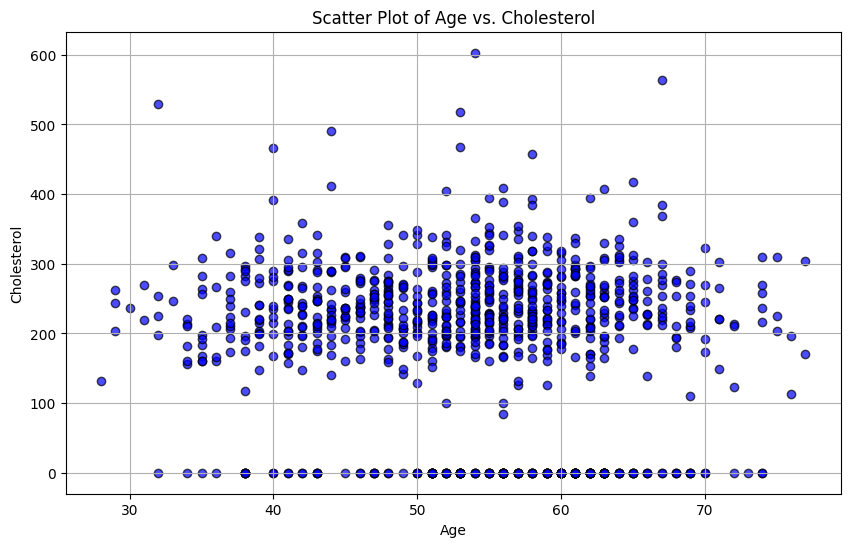

In [91]:
#Part L
x_attr = 'Age'
y_attr = 'Cholesterol'

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[x_attr], df[y_attr], alpha=0.7, color='blue', edgecolors='black')
plt.xlabel(x_attr)
plt.ylabel(y_attr)
plt.title(f'Scatter Plot of {x_attr} vs. {y_attr}')
plt.grid(True)
plt.show()
# We chose Age and Cholesterol to measure their relationship in a scatter plot, there were alot of 0 values which we considered as null.
# the highest value found was 603 for someone inbetween the ages of 50 and 60.

In [92]:
#Part M
numerical_columns = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print("Standardized Data:")
print(df.head(10))
# All the data shown fall under normal standardized value

Standardized Data:
        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0 -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal   
1 -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2 -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3 -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4  0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   
5 -1.539213   M           NAP  -0.669935     1.282424  -0.551341     Normal   
6 -0.902775   F           ATA  -0.129513     0.349422  -0.551341     Normal   
7  0.051881   M           ATA  -1.210356     0.084157  -0.551341     Normal   
8 -1.751359   M           ASY   0.410909     0.075010  -0.551341     Normal   
9 -0.584556   F           ATA  -0.669935     0.779335  -0.551341     Normal   

      MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0  1.382928              N -0.832432       Up    

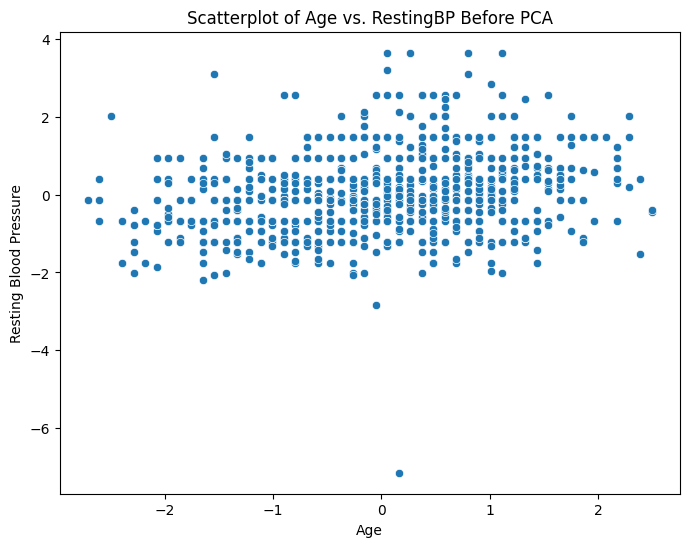

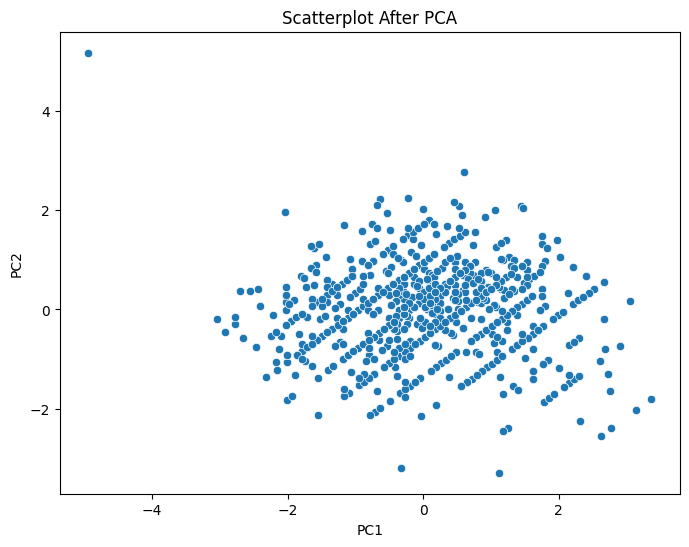

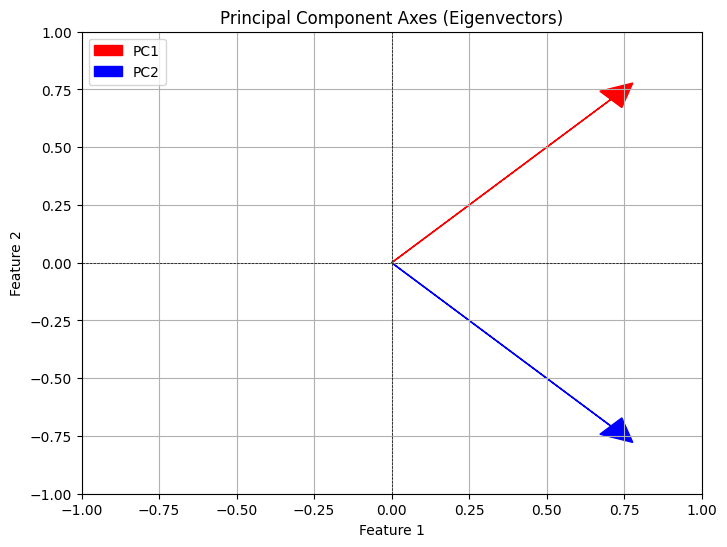

In [99]:
#Part N

# Select only numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numerical_columns]

# Normalize the data using StandardScaler (mean = 0, std deviation = 1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Scatterplot of Age vs. Resting Blood Pressure BEFORE PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_numeric['Age'], y=df_numeric['RestingBP'])
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.title("Scatterplot of Age vs. RestingBP Before PCA")
plt.show()

# Apply PCA to reduce dimensions of the entire dataset to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Select only 'Age' and 'RestingBP' for separate PCA analysis
selected_features = df_numeric[['Age', 'RestingBP']]

# Standardize the selected features
scaler = StandardScaler()
selected_scaled = scaler.fit_transform(selected_features)

# Apply PCA to the selected features
pca = PCA(n_components=2)
df_pca_selected = pca.fit_transform(selected_scaled)

# Convert PCA result to a DataFrame
df_pca_selected = pd.DataFrame(df_pca_selected, columns=['PC1', 'PC2'])

# Scatterplot AFTER PCA (transformed data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_selected['PC1'], y=df_pca_selected['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatterplot After PCA")
plt.show()

# Plot principal component axes (eigenvectors)
plt.figure(figsize=(8, 6))

origin = np.array([0, 0])  # Define origin (0,0) for vector plotting
eigenvectors = pca.components_  # Extract principal component directions

# Plot each principal component as an arrow
for i in range(2):
    plt.arrow(origin[0], origin[1], eigenvectors[i, 0], eigenvectors[i, 1],
              head_width=0.1, head_length=0.1, color=['r', 'b'][i], label=f"PC{i+1}")

# Add horizontal and vertical reference lines
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Set axis limits for better visualization
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Label axes and add title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Principal Component Axes (Eigenvectors)")

# Display grid and show plot
plt.grid()
plt.show()



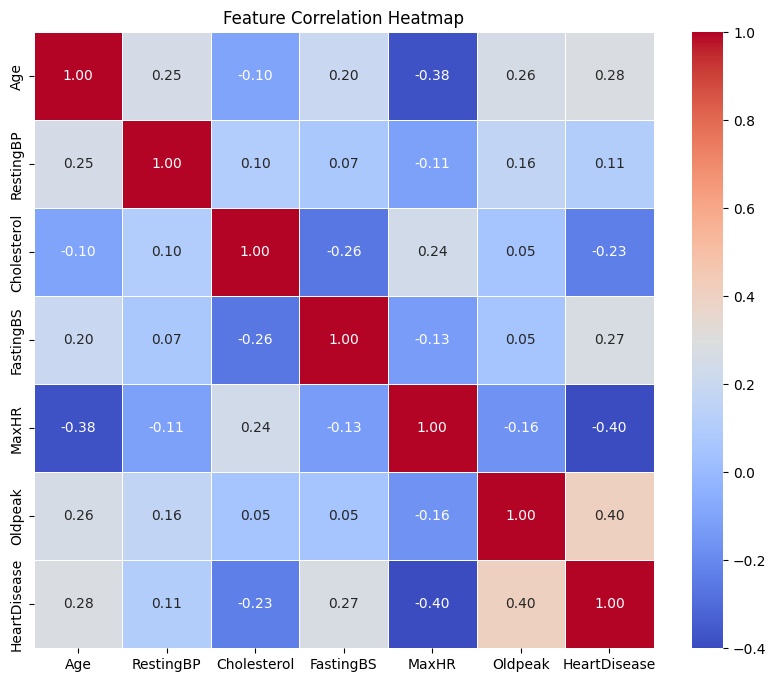

In [94]:
#Part O
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
# From the heatmap we were able to identify that Cholesterol and Heart Risk Score have the highest correlation,
# while MaxHR and HeartRate have the weakest correlation.

In [95]:
#Analytical

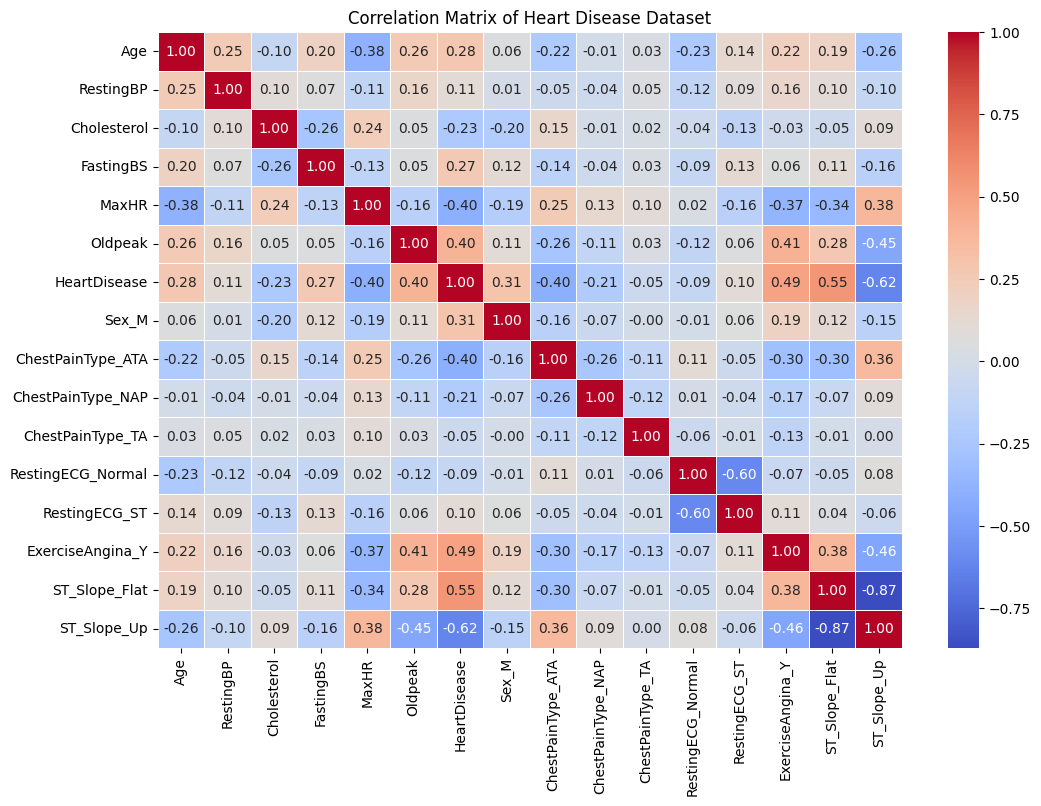

,HeartDisease
HeartDisease,1.000000
ST_Slope_Up,0.622164
ST_Slope_Flat,0.554134
ExerciseAngina_Y,0.494282
Oldpeak,0.403951
ChestPainType_ATA,0.401924
MaxHR,0.400421
Sex_M,0.305445
Age,0.282039
FastingBS,0.267291


In [96]:
#Part A
import seaborn as sns
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Heart Disease Dataset")
plt.show()

correlation_with_target = correlation_matrix["HeartDisease"].abs().sort_values(ascending=False)
correlation_with_target
# ST_Slope_Up, ExerciseAngina_Y, and Oldpeak have a high colleration with Heart Disease

Class Distribution for 'ChestPainType':
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64



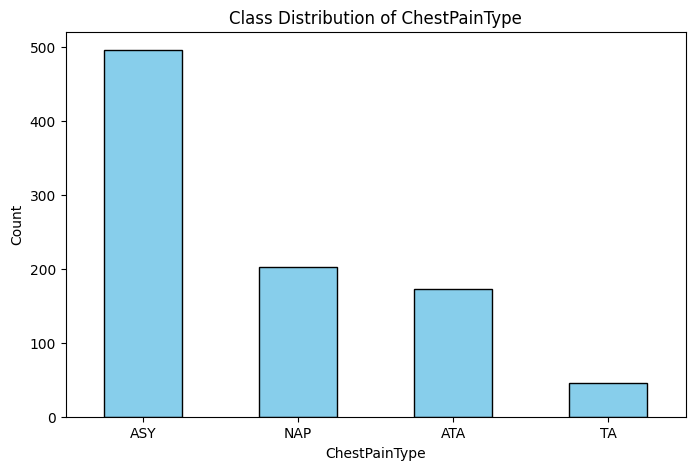

In [97]:
#Part B analytical
categorical_feature = ("ChestPainType")
class_distribution = df[categorical_feature].value_counts()
print(f"Class Distribution for '{categorical_feature}':\n{class_distribution}\n")
plt.figure(figsize=(8, 5))
class_distribution.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel(categorical_feature)
plt.ylabel("Count")
plt.title(f"Class Distribution of {categorical_feature}")
plt.xticks(rotation=0)
plt.show()
#The categorial feature we used was Chest Pain type, the results in the dataset were imbalanced. Most common chestpaintype is ASY
# containing about 500 values and the least common one is TA, containing 46 values.

In [98]:
#Part C analytical

# Get the original mean and std before standardization
age_mean = df_numeric["Age"].mean()
age_std = df_numeric["Age"].std()

# Reverse standardization




df["AgeGroup"] = pd.cut(df["Age"], bins=[-2, -0.5, 0.5, 2], labels=["Young", "Middle-aged", "Senior"])


df["HeartRiskScore"] = df["Cholesterol"] * df["RestingBP"]

df["HeartRateReserve"] = 220 - df["Age"] - df["MaxHR"]

print(df.head(10))
#We added 3 new features. Age Group, Heart Risk Score, Heart Rate Reserve. Age Group is significant to help us
#identify patterns in heart disease based on age groups. Heart Risk Score indicates a greater risk of cardiovascular issues due to elevated
# cholesterol and blood pressure. Heart Rate Reserve show that lower values indicate poor cardiovascular fitness
# and may correlate with heart disease

        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0 -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal   
1 -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2 -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3 -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4  0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   
5 -1.539213   M           NAP  -0.669935     1.282424  -0.551341     Normal   
6 -0.902775   F           ATA  -0.129513     0.349422  -0.551341     Normal   
7  0.051881   M           ATA  -1.210356     0.084157  -0.551341     Normal   
8 -1.751359   M           ASY   0.410909     0.075010  -0.551341     Normal   
9 -0.584556   F           ATA  -0.669935     0.779335  -0.551341     Normal   

      MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease     AgeGroup  \
0  1.382928              N -0.832432       Up     -1.1